In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
pip install nltk

In [ ]:
pip install vader

     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for sonopy: filename=sonopy-0.1.2-cp37-none-any.whl size=2880 sha256=5b207f8feafa782ff8ba22627ff679aeb81c438191d9d2aa8c8f4c7eeb4c15bb
  Stored in directory: /root/.cache/pip/wheels/b6/39/ba/b2f21d4fbcb362658c73f83c9502782300b0399aef3693b506
Successfully built sonopy


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
Reviews=pd.read_excel("/content/HOTELREVIEW.xlsx")


In [ ]:
Reviews.head()

,Field1
0,I have now waited a year to get back my deposi...
1,Had a great stay. Loved the room and design. ...
2,We are from Canada and had booked our Daughter...
3,We are from Canada and had planned our Daughte...
4,We'd like to thank all the staff at Hotel Gira...


In [ ]:
Reviews['Reviews']=Reviews['Field1']
del Reviews['Field1']
Reviews

,Reviews
0,I have now waited a year to get back my deposi...
1,Had a great stay. Loved the room and design. ...
2,We are from Canada and had booked our Daughter...
3,We are from Canada and had planned our Daughte...
4,We'd like to thank all the staff at Hotel Gira...
...,...
703,We were so impressed with the service at the G...
704,"I have travelled to NYC about 20 times, and th..."
705,The rooms were very clean and well kept. The ...
706,The staff were cheery and helpful always there...


# **Cleaning Text**




**To clean textual data, we call our custom 'clean_text' function that performs several transformations:**



*   lower the text
*   tokenize the text (split the text into words) and remove the punctuation
*   remove useless words that contain numbers
*   remove useless stop words like 'the', 'a' ,'this' etc.
*   Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
*   lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)








In [ ]:
# remove 'No Negative' or 'No Positive' from text
Reviews["Reviews"] = Reviews["Reviews"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
Reviews["review_clean"] = Reviews["Reviews"].apply(lambda x: clean_text(x))

In [ ]:
Reviews.head()

,Reviews,review_clean
0,I have now waited a year to get back my deposi...,wait year get back deposit mean flexi rate ema...
1,Had a great stay. Loved the room and design. ...,great stay love room design hotel staff friend...
2,We are from Canada and had booked our Daughter...,canada book daughter wed reception hotel septe...
3,We are from Canada and had planned our Daughte...,canada plan daughter's wed new york september ...
4,We'd like to thank all the staff at Hotel Gira...,we'd like thank staff hotel giraffe helpful bo...


# **Feature engineering**

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:



*   a neutrality score
*   a positivity score
*   a negativity score
*   an overall score that summarizes the previous scores



In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
Reviews['positive'] = Reviews.iloc[:,1].apply(lambda x: sia.polarity_scores(x)['pos'])
Reviews['neutral'] = Reviews.iloc[:,1].apply(lambda x: sia.polarity_scores(x)['neu'])
Reviews['negative'] = Reviews.iloc[:,1].apply(lambda x: sia.polarity_scores(x)['neg'])
Reviews['compound'] = Reviews.iloc[:,1].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
Reviews

,Reviews,review_clean,positive,neutral,negative,compound
0,I have now waited a year to get back my deposi...,wait year get back deposit mean flexi rate ema...,0.000,0.708,0.292,-0.8591
1,Had a great stay. Loved the room and design. ...,great stay love room design hotel staff friend...,0.509,0.491,0.000,0.9559
2,We are from Canada and had booked our Daughter...,canada book daughter wed reception hotel septe...,0.097,0.838,0.065,0.1779
3,We are from Canada and had planned our Daughte...,canada plan daughter's wed new york september ...,0.165,0.774,0.061,0.8934
4,We'd like to thank all the staff at Hotel Gira...,we'd like thank staff hotel giraffe helpful bo...,0.423,0.577,0.000,0.9863
...,...,...,...,...,...,...
703,We were so impressed with the service at the G...,impressed service giraffe whenever ask somethi...,0.387,0.512,0.101,0.9779
704,"I have travelled to NYC about 20 times, and th...",travel nyc time first time stayed hotel say wo...,0.425,0.575,0.000,0.9595
705,The rooms were very clean and well kept. The ...,room clean well keep breakfast adequate staff ...,0.415,0.585,0.000,0.9100
706,The staff were cheery and helpful always there...,staff cheery helpful always need food fresh di...,0.456,0.504,0.039,0.9584


In [ ]:


pos_review = [ j for i, j in enumerate(Reviews.iloc[:,0]) if Reviews['compound'][i] > 0.2 ]
neu_review = [ j for i, j in enumerate(Reviews.iloc[:,0]) if  -0.2 >=Reviews['compound'][i]<=0.2]
neg_review = [ j for i, j in enumerate(Reviews.iloc[:,0]) if Reviews['compound'][i] < -0.2 ]

In [ ]:
print("Percentage of positive reviews {}%".format(len(pos_review)*100/len(Reviews.iloc[:,1])))
print("Percentage of neutral reviews {}%".format(len(neu_review)*100/len(Reviews.iloc[:,1])))
print("Percentage of negative reviews {}%".format(len(neg_review)*100/len(Reviews.iloc[:,1])))

Percentage of positive reviews 98.44632768361582%
Percentage of neutral reviews 0.847457627118644%
Percentage of negative reviews 0.847457627118644%


Next, we add some simple metrics for every text:



*   number of characters in the text
*   number of words in the text




In [ ]:
# add number of characters column
Reviews["nb_chars"] = Reviews["Reviews"].apply(lambda x: len(x))

# add number of words column
Reviews["nb_words"] = Reviews["Reviews"].apply(lambda x: len(x.split(" ")))

In [ ]:
Reviews

,Reviews,review_clean,positive,neutral,negative,compound,nb_chars,nb_words
0,I have now waited a year to get back my deposi...,wait year get back deposit mean flexi rate ema...,0.000,0.708,0.292,-0.8591,337,73
1,Had a great stay. Loved the room and design. ...,great stay love room design hotel staff friend...,0.509,0.491,0.000,0.9559,217,47
2,We are from Canada and had booked our Daughter...,canada book daughter wed reception hotel septe...,0.097,0.838,0.065,0.1779,548,97
3,We are from Canada and had planned our Daughte...,canada plan daughter's wed new york september ...,0.165,0.774,0.061,0.8934,1331,251
4,We'd like to thank all the staff at Hotel Gira...,we'd like thank staff hotel giraffe helpful bo...,0.423,0.577,0.000,0.9863,758,137
...,...,...,...,...,...,...,...,...
703,We were so impressed with the service at the G...,impressed service giraffe whenever ask somethi...,0.387,0.512,0.101,0.9779,675,127
704,"I have travelled to NYC about 20 times, and th...",travel nyc time first time stayed hotel say wo...,0.425,0.575,0.000,0.9595,341,66
705,The rooms were very clean and well kept. The ...,room clean well keep breakfast adequate staff ...,0.415,0.585,0.000,0.9100,304,56
706,The staff were cheery and helpful always there...,staff cheery helpful always need food fresh di...,0.456,0.504,0.039,0.9584,329,55


In [ ]:
Reviews.tail()

,Reviews,review_clean,positive,neutral,negative,compound,nb_chars,nb_words
703,We were so impressed with the service at the G...,impressed service giraffe whenever ask somethi...,0.387,0.512,0.101,0.9779,675,127
704,"I have travelled to NYC about 20 times, and th...",travel nyc time first time stayed hotel say wo...,0.425,0.575,0.000,0.9595,341,66
705,The rooms were very clean and well kept. The ...,room clean well keep breakfast adequate staff ...,0.415,0.585,0.000,0.9100,304,56
706,The staff were cheery and helpful always there...,staff cheery helpful always need food fresh di...,0.456,0.504,0.039,0.9584,329,55
707,This was our third stay at Giraffe. Quiet room...,third stay giraffe quiet room well appoint won...,0.548,0.452,0.000,0.9607,217,34


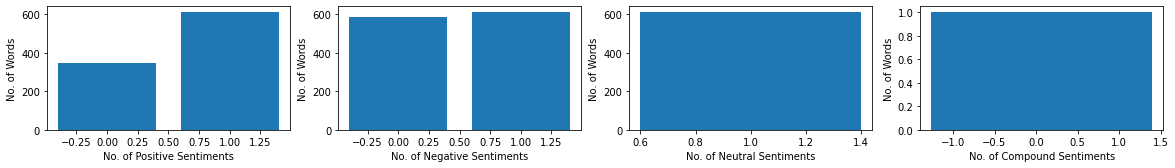

In [ ]:
plt.figure(figsize=(20, 5)) # width:20, height:5
plt.subplot(2,4,1)
plt.bar(Reviews[Reviews["nb_words"] >=5].sort_values("positive", ascending = False)[ "positive"]>=0.2, Reviews['nb_words'] ,width=0.8)
plt.xlabel("No. of Positive Sentiments")
plt.ylabel("No. of Words")
plt.subplot(2,4,2)
plt.bar(Reviews[Reviews["nb_words"] >=5].sort_values("negative", ascending = False)[ "negative"]>=0.1, Reviews['nb_words'] ,width=0.8)
plt.xlabel("No. of Negative Sentiments")
plt.ylabel("No. of Words")
plt.subplot(2,4,3)
plt.bar(Reviews[Reviews["nb_words"] >=5].sort_values("neutral", ascending = False)[ "neutral"]>=0.2, Reviews['nb_words'] ,width=0.8)
plt.xlabel("No. of Neutral Sentiments")
plt.ylabel("No. of Words")
plt.subplot(2,4,4)
plt.bar(Reviews['compound'], Reviews['nb_words']>5)
plt.xlabel("No. of Compound Sentiments")
plt.ylabel("No. of Words")
plt.show()

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [ ]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(Reviews["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = Reviews["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
Reviews = pd.concat([Reviews, doc2vec_df], axis=1)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(Reviews["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = Reviews.index
Reviews = pd.concat([Reviews, tfidf_df], axis=1)

In [ ]:
Reviews.head()

,Reviews,review_clean,positive,neutral,negative,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_able,word_absolutely,word_access,word_accommodate,word_accommodation,word_across,word_actually,word_add,word_adequate,word_afternoon,word_ago,word_air,word_allow,word_almost,word_already,word_also,word_although,word_always,word_amaze,word_amazing,word_amenity,word_anniversary,word_another,word_anyone,word_anything,word_anywhere,word_appoint,...,word_try,word_tulip,word_turn,word_tv,word_two,word_union,word_upon,word_uptown,word_use,word_valet,word_value,word_ve,word_view,word_visit,word_wait,word_walk,word_want,word_warm,word_water,word_way,word_we,word_week,word_weekend,word_welcome,word_welcoming,word_well,word_wife,word_window,word_wine,word_wish,word_within,word_without,word_wonderful,word_work,word_worth,word_would,word_year,word_yet,word_york,word_young
0,I have now waited a year to get back my deposi...,wait year get back deposit mean flexi rate ema...,0.000,0.708,0.292,-0.8591,337,73,0.480173,0.151966,-0.429533,0.138344,-0.777009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.276944,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.172994,0.220291,0.0,0.000000,0.0
1,Had a great stay. Loved the room and design. ...,great stay love room design hotel staff friend...,0.509,0.491,0.000,0.9559,217,47,0.062110,-0.053808,-0.098012,0.042536,-0.034703,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244902,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.216151,0.000000,0.0,0.000000,0.0
2,We are from Canada and had booked our Daughter...,canada book daughter wed reception hotel septe...,0.097,0.838,0.065,0.1779,548,97,0.817675,0.367068,-0.945666,0.205787,-1.402983,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.225482,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.215606,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.155598,0.0
3,We are from Canada and had planned our Daughte...,canada plan daughter's wed new york september ...,0.165,0.774,0.061,0.8934,1331,251,1.212094,0.453719,-1.480571,0.420040,-2.243388,0.420355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244605,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.103375,0.117481,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.12089,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.080954,0.0,0.214007,0.0
4,We'd like to thank all the staff at Hotel Gira...,we'd like thank staff hotel giraffe helpful bo...,0.423,0.577,0.000,0.9863,758,137,0.390565,0.265716,-0.580620,0.262351,-0.827584,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.126346,0.0,0.123322,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120893,0.000000,0.0,0.141923,0.0,0.0,0.143924,0.152213,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.068564,0.0,0.0,0.000000,0.117496,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


In [ ]:
Reviews.shape

(708, 555)

# Exploratory data analysis

In [ ]:
Reviews["is_bad_review"] = Reviews["compound"].apply(lambda x: 1 if x < 0.05 else 0)
Reviews["is_bad_review"].value_counts(normalize = True)

0    0.987288
1    0.012712
Name: is_bad_review, dtype: float64

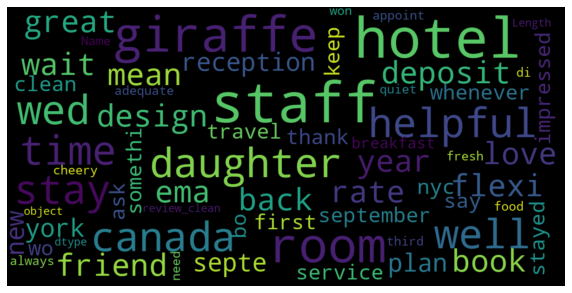

In [ ]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud,interpolation="bilinear" )
    plt.show()
    
# print wordcloud
show_wordcloud(Reviews["review_clean"])

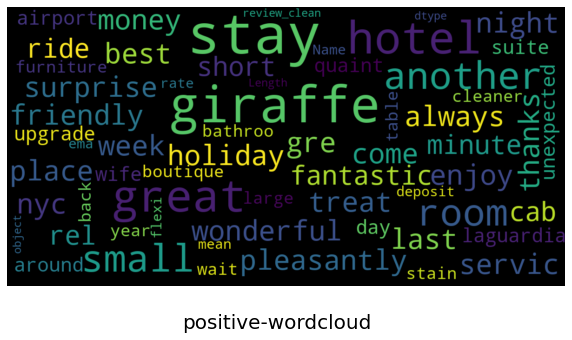

In [ ]:
def plot_wordcloud_top_n(df,number_of_reviews,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_reviews,score_column)

    show_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(Reviews,708,'positive','review_clean','positive-wordcloud')

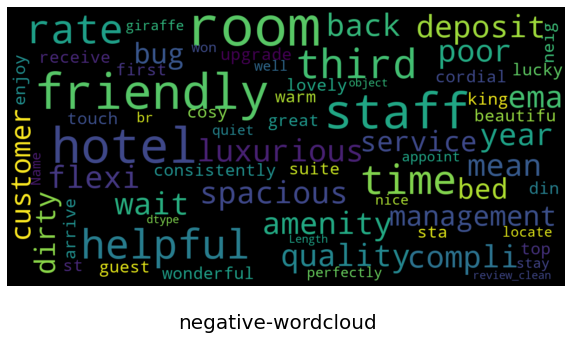

In [ ]:
def plot_wordcloud_top_n(df,number_of_reviews,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_reviews,score_column)

    show_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(Reviews,708,'negative','review_clean','negative-wordcloud')

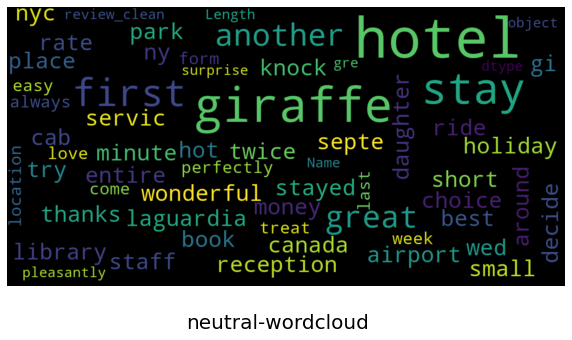

In [ ]:
def plot_wordcloud_top_n(df,number_of_reviews,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_reviews,score_column)

    show_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(Reviews,708,'neutral','review_clean','neutral-wordcloud')

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
Reviews[Reviews["nb_words"] >= 5].sort_values("positive", ascending = False)[["Reviews", "positive"]].head(10)

,Reviews,positive
554,"I stayed at the Giraffe last week, and I was p...",0.727
620,It's always a treat to stay at The Giraffe! We...,0.721
219,"For my money, The Giraffe is the best place to...",0.703
613,Thanks Hotel Giraffe for another wonderful hol...,0.700
324,We enjoyed 5 nights at this great friendly hot...,0.698
582,We really enjoyed our stay at the Hotel Giraff...,0.686
553,The location is excellent - very convenient. ...,0.676
360,Staff was very friendly and super accommodatin...,0.673
90,"The staff is so friendly, helpful, gracious. I...",0.663
93,Front desk is outstanding/José is a stellar ge...,0.663


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
Reviews[Reviews["nb_words"] >= 5].sort_values("negative", ascending = False)[["Reviews", "negative"]].head(10)

,Reviews,negative
423,Spacious room with luxurious amenities. Qualit...,0.300
0,I have now waited a year to get back my deposi...,0.292
570,Poor management and customer service. Dirty. T...,0.267
480,Consistently top rate: friendly staff and wond...,0.187
580,All hotel and dining room staff were cordial a...,0.180
668,Wonderful hotel. always our first choice. bu...,0.171
290,This is a quaint boutique hotel with small roo...,0.165
538,"Room could have been cleaner, furniture very s...",0.164
552,"This was my second stay at the the Giraffe, an...",0.158
240,nice modern rooms. very clean attentive and pr...,0.153


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


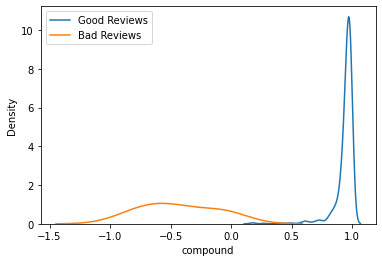

In [ ]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = Reviews[Reviews['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
plt.legend(labels=['Good Reviews','Bad Reviews'])

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "Reviews", "review_clean"]
features = [c for c in Reviews.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Reviews[features], Reviews[label], test_size = 0.20, random_state = 42)

In [ ]:
y_test

120    0
247    0
324    0
204    0
603    0
      ..
41     0
108    0
582    0
56     0
432    0
Name: is_bad_review, Length: 142, dtype: int64

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(30)

,feature,importance
3,compound,0.160616
0,positive,0.087725
2,negative,0.072950
1,neutral,0.024058
442,word_sister,0.020686
490,word_theater,0.019088
423,word_say,0.018808
279,word_level,0.018194
320,word_modern,0.017992
104,word_coffee,0.016752


In [ ]:
from sklearn import metrics
y_pred = rf.predict(X_test)

print(f'Accurcy: {metrics.accuracy_score(y_pred, y_test)}')
print(f'Precision: {metrics.precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.9929577464788732
Precision: 1.0
Recall: 0.9929577464788732


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


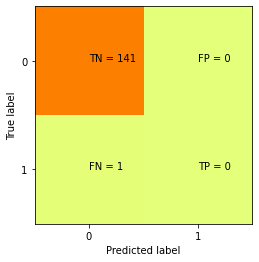

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.array(y_test), y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [ ]:
feature_importances_df.tail(60)

,feature,importance
302,word_madison,0.0
301,word_machine,0.0
300,word_low,0.0
298,word_loved,0.0
261,word_iron,0.0
260,word_incredibly,0.0
257,word_immaculate,0.0
192,word_fantastic,0.0
215,word_full,0.0
211,word_friend,0.0


([<matplotlib.axis.XTick at 0x7f74b6e5a290>,
 <a list of 21 Text major ticklabel objects>)

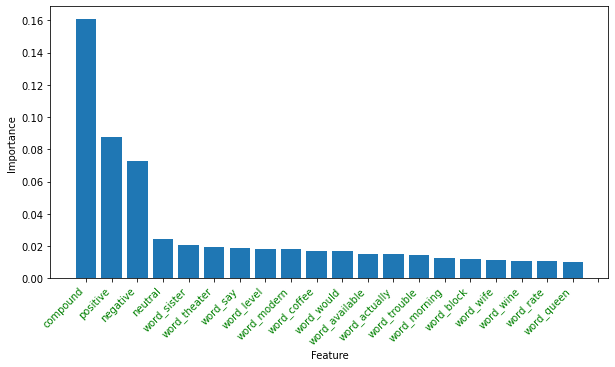

In [ ]:
plt.figure(figsize=(10, 5)) # width:10, height:5
plt.bar(feature_importances_df.head(20).feature, feature_importances_df.head(20).importance ,width=0.8)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(np.arange(0, len(feature_importances_df.feature.head(20))+1,1),color = 'green',rotation = 45, horizontalalignment = 'right')

In [ ]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

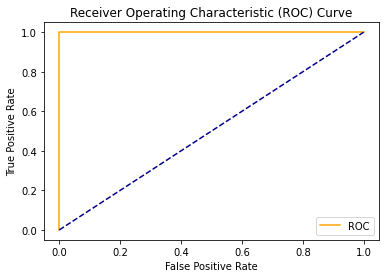

In [ ]:
from sklearn.metrics import roc_curve
probs = rf.predict_proba(X_test)  
probs = probs[:, 1]  
fpr, tpr,_ = roc_curve(y_test, probs) 
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,probs)
roc_auc

1.0

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)



lw = 2
plt.figure(1, figsize = (15, 10))

plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' )

In [ ]:

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [ ]:
pip install funcsigs